# INSTALL & IMPORT LIBRARY

In [ ]:
!pip install contractions
!pip install Sastrawi


In [ ]:
# Import library yang diperlukan
from google.colab import drive
import pandas as pd
import numpy as np
import re
import io
import time
import unicodedata
import string
import nltk
import contractions
from textblob import TextBlob
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [ ]:
# Download sumber daya NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# Langkah 1: Mount Google Drive
drive.mount('/content/drive')

# Ganti dengan path ke file dataset Anda
file_path = '/content/drive/My Drive/Colab Notebooks/PROJECT_NLP/dataset/Ernando_Terbaru.csv'
data = pd.read_csv(file_path)
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,Unnamed: 991,Unnamed: 992,Unnamed: 993,Unnamed: 994,Unnamed: 995,Unnamed: 996,Unnamed: 997,Unnamed: 998,Unnamed: 999,Unnamed: 1000
0,1.7996E+18,Sun Jun 09 00:36:01 +0000 2024,0,Seribu Penyelamatan seakan lenyap karena Satu ...,1.7996E+18,https://pbs.twimg.com/media/GPl3ym6bQAAo6f-.jpg,NaN,in,"Jakarta,Indonesia",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.75191E+18,Mon Jan 29 10:22:26 +0000 2024,42,Kiper timnas Indonesia Ernando Ari ternyata me...,1.75191E+18,https://pbs.twimg.com/ext_tw_video_thumb/17518...,NaN,in,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.80007E+18,Mon Jun 10 07:43:24 +0000 2024,0,Ketua Badan Tim Nasional (BTN) Sumardji mengun...,1.80007E+18,https://pbs.twimg.com/ext_tw_video_thumb/18000...,NaN,in,"Jakarta, Indonesia",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.79928E+18,Sat Jun 08 03:21:10 +0000 2024,0,Banyak Buat Kesalahan Ketidaksanggupan keluar ...,1.79928E+18,https://pbs.twimg.com/media/GPhTT-iacAA3sY8.jpg,cuapcuapbola,in,Indonesia,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.7989E+18,Fri Jun 07 02:07:27 +0000 2024,0,Dari cr ngmongny kliatan mentalitasny. Kl lu k...,1.7989E+18,https://pbs.twimg.com/amplify_video_thumb/1798...,NaN,in,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,3.15077E+17,Fri Mar 22 12:24:37 +0000 2013,0,Ga dibayar pemain IPL dijamin bersih minumnya ...,3.15077E+17,NaN,NaN,in,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2375,8.1883E+17,Tue Jan 10 18:00:54 +0000 2017,0,@RTLLateNight @BarackObama vertrek VS uit Irak...,8.1888E+17,NaN,rtltalkshow,nl,Netherlands,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2376,6.49718E+17,Thu Oct 01 22:49:05 +0000 2015,0,Lavrov verdedigt #Russische aanval http://t.co...,6.49718E+17,NaN,NaN,nl,Nederland,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2377,2.78775E+16,Wed Jan 19 23:58:17 +0000 2011,0,Door even botte als naieve aanpak VS in Irak o...,2.78775E+16,NaN,NaN,nl,"Jordaan, Amsterdam",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# LABELING DATA

In [ ]:
import re
from textblob import TextBlob

# Function to classify sentiment using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification
data['sentiment'] = data['full_text'].apply(get_sentiment)


sentiment_counts = data['sentiment'].value_counts()
sentiment_counts


sentiment
neutral     2064
positive     199
negative     116
Name: count, dtype: int64

# PREPROCESSING DATA

## DATA CLEANSING

In [ ]:
duplicates = data[data.duplicated(['username', 'full_text'])]
print(duplicates)


     conversation_id_str                      created_at favorite_count  \
39           1.75191E+18  Mon Jan 29 10:22:26 +0000 2024             42   
40           1.80019E+18  Mon Jun 10 15:39:55 +0000 2024              5   
41           1.79928E+18  Sat Jun 08 03:04:03 +0000 2024              1   
43           1.80081E+18  Wed Jun 12 08:52:51 +0000 2024              0   
44           1.80081E+18  Wed Jun 12 08:45:24 +0000 2024              0   
...                  ...                             ...            ...   
2343         1.79874E+18  Thu Jun 06 15:30:02 +0000 2024              1   
2345         1.79994E+18  Sun Jun 09 23:16:12 +0000 2024              3   
2350         1.80017E+18  Mon Jun 10 14:32:04 +0000 2024              0   
2359         1.80005E+18  Mon Jun 10 06:27:36 +0000 2024              1   
2361          1.7994E+18  Sat Jun 08 11:29:11 +0000 2024              2   

                                              full_text       id_str  \
39    Kiper timnas Indonesi

In [ ]:
num_duplicates = data.duplicated().sum()
print(f'Jumlah baris duplikat: {num_duplicates}')


Jumlah baris duplikat: 613


In [ ]:
data_cleaned = data.drop_duplicates()
print("Data setelah menghapus duplikat:")
print(data_cleaned)


Data setelah menghapus duplikat:
     conversation_id_str                      created_at favorite_count  \
0             1.7996E+18  Sun Jun 09 00:36:01 +0000 2024              0   
1            1.75191E+18  Mon Jan 29 10:22:26 +0000 2024             42   
2            1.80007E+18  Mon Jun 10 07:43:24 +0000 2024              0   
3            1.79928E+18  Sat Jun 08 03:21:10 +0000 2024              0   
4             1.7989E+18  Fri Jun 07 02:07:27 +0000 2024              0   
...                  ...                             ...            ...   
2374         3.15077E+17  Fri Mar 22 12:24:37 +0000 2013              0   
2375          8.1883E+17  Tue Jan 10 18:00:54 +0000 2017              0   
2376         6.49718E+17  Thu Oct 01 22:49:05 +0000 2015              0   
2377         2.78775E+16  Wed Jan 19 23:58:17 +0000 2011              0   
2378          1.0805E+16  Fri Dec 03 21:19:57 +0000 2010              0   

                                              full_text       id_s

In [ ]:
# Melihat jumlah label positif dan negatif setelah di drop duplicatates
label_counts = data_cleaned['sentiment'].value_counts()
print(label_counts)

sentiment
neutral     1508
positive     167
negative      91
Name: count, dtype: int64


In [ ]:
# Menyimpan hanya kolom 'full_text' dan 'sentiment'
data_cleaned = data[['full_text', 'sentiment']]
print("Cleaned Data:\n", data_cleaned.head())

# Untuk memastikan kolom lain terhapus
print("Columns after dropping others:\n", data_cleaned.columns)

Cleaned Data:
                                            full_text sentiment
0  Seribu Penyelamatan seakan lenyap karena Satu ...   neutral
1  Kiper timnas Indonesia Ernando Ari ternyata me...   neutral
2  Ketua Badan Tim Nasional (BTN) Sumardji mengun...  negative
3  Banyak Buat Kesalahan Ketidaksanggupan keluar ...   neutral
4  Dari cr ngmongny kliatan mentalitasny. Kl lu k...  positive
Columns after dropping others:
 Index(['full_text', 'sentiment'], dtype='object')


In [ ]:
data_cleaned

,full_text,sentiment
0,Seribu Penyelamatan seakan lenyap karena Satu ...,neutral
1,Kiper timnas Indonesia Ernando Ari ternyata me...,neutral
2,Ketua Badan Tim Nasional (BTN) Sumardji mengun...,negative
3,Banyak Buat Kesalahan Ketidaksanggupan keluar ...,neutral
4,Dari cr ngmongny kliatan mentalitasny. Kl lu k...,positive
...,...,...
2374,Ga dibayar pemain IPL dijamin bersih minumnya ...,neutral
2375,@RTLLateNight @BarackObama vertrek VS uit Irak...,neutral
2376,Lavrov verdedigt #Russische aanval http://t.co...,neutral
2377,Door even botte als naieve aanpak VS in Irak o...,neutral


In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  2379 non-null   object
 1   sentiment  2379 non-null   object
dtypes: object(2)
memory usage: 37.3+ KB


In [ ]:
num_rows = data_cleaned.count().max()
print(f'Jumlah baris: {num_rows}')


Jumlah baris: 2379


In [ ]:
# banyaknya perbedaan/keunikan dalam dataset
print(len(data_cleaned.full_text.unique()))

1658


In [ ]:
# rata-rata
data_cleaned.sentiment.drop_duplicates().apply(len).mean()

7.666666666666667

In [ ]:
# tampilkan kategori sentiment
data_cleaned.sentiment.drop_duplicates().tolist()

['neutral', 'negative', 'positive']

### DROP NEUTRAL SENTIMENT

In [ ]:
data_cleaned = data.drop(data.loc[data.sentiment == 'neutral'].index).reset_index(drop = True)#hapus data yang neutral
data_cleaned


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,Unnamed: 992,Unnamed: 993,Unnamed: 994,Unnamed: 995,Unnamed: 996,Unnamed: 997,Unnamed: 998,Unnamed: 999,Unnamed: 1000,sentiment
0,1.80007E+18,Mon Jun 10 07:43:24 +0000 2024,0,Ketua Badan Tim Nasional (BTN) Sumardji mengun...,1.80007E+18,https://pbs.twimg.com/ext_tw_video_thumb/18000...,NaN,in,"Jakarta, Indonesia",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
1,1.7989E+18,Fri Jun 07 02:07:27 +0000 2024,0,Dari cr ngmongny kliatan mentalitasny. Kl lu k...,1.7989E+18,https://pbs.twimg.com/amplify_video_thumb/1798...,NaN,in,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive
2,1.67081E+18,Mon Jun 19 15:05:57 +0000 2023,0,APRESIASI JUGA BUAT MANUSIA INI LAAHHHHhh erna...,1.67081E+18,https://pbs.twimg.com/media/Fy_o-y4WIAEJ8Yk.jpg,NaN,in,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive
3,1.75186E+18,Mon Jan 29 06:30:25 +0000 2024,0,Cerdas!! Detail permainan dicatat dengan rapi ...,1.75186E+18,NaN,NaN,in,"Balikpapan Selatan, Indonesia",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive
4,1.6956E+18,Sun Aug 27 04:22:42 +0000 2023,0,@GOAL_ID Ternyata sampai saat ini masih berlak...,1.69565E+18,NaN,GOAL_ID,in,Indonesia,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,1.80055E+18,Tue Jun 11 23:44:19 +0000 2024,0,@hnyss_ @sainzgurls Mentalnya down smnjak blun...,1.80068E+18,NaN,hnyss_,in,Bandung,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
311,1.80045E+18,Tue Jun 11 08:47:03 +0000 2024,0,Pihak Persebaya Surabaya yakin Ernando Ari bis...,1.80045E+18,NaN,NaN,in,JAKARTA,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
312,1.79994E+18,Sun Jun 09 23:16:12 +0000 2024,3,Ketua BTN Ungkap Mental Ernando Usai Blunder d...,1.79994E+18,NaN,NaN,in,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
313,2.99181E+17,Wed Feb 06 15:42:57 +0000 2013,0,Mungkin dia lelah RT @BeritaArsenal: FT : Irak...,2.99181E+17,NaN,NaN,in,Heaven,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative


In [ ]:
# jumlah baris data setelah data neutral dihapus
num_rows = data_cleaned.count().max()
print(f'Jumlah baris: {num_rows}')

Jumlah baris: 315


## CASE FOLDING

In [ ]:
# Case Folding

data_cleaned.full_text = data_cleaned.full_text.str.lower()
data_cleaned[['sentiment', 'full_text']].head()

,sentiment,full_text
0,negative,ketua badan tim nasional (btn) sumardji mengun...
1,positive,dari cr ngmongny kliatan mentalitasny. kl lu k...
2,positive,apresiasi juga buat manusia ini laahhhhhh erna...
3,positive,cerdas!! detail permainan dicatat dengan rapi ...
4,positive,@goal_id ternyata sampai saat ini masih berlak...


## REMOVE

### URL's

In [ ]:
# URL

data_cleaned.full_text = data_cleaned.full_text.str.replace(r'http(s)?://\S+|www\.\S+', '', regex=True)
data_cleaned[['sentiment', 'full_text']].head()

,sentiment,full_text
0,negative,ketua badan tim nasional (btn) sumardji mengun...
1,positive,dari cr ngmongny kliatan mentalitasny. kl lu k...
2,positive,apresiasi juga buat manusia ini laahhhhhh erna...
3,positive,cerdas!! detail permainan dicatat dengan rapi ...
4,positive,@goal_id ternyata sampai saat ini masih berlak...


### EMAIL

In [ ]:
# Email

data_cleaned.full_text = data_cleaned.full_text.apply(lambda x: re.sub(r'\S+@\S+', '', x))
data_cleaned[['sentiment', 'full_text']].head()

,sentiment,full_text
0,negative,ketua badan tim nasional (btn) sumardji mengun...
1,positive,dari cr ngmongny kliatan mentalitasny. kl lu k...
2,positive,apresiasi juga buat manusia ini laahhhhhh erna...
3,positive,cerdas!! detail permainan dicatat dengan rapi ...
4,positive,@goal_id ternyata sampai saat ini masih berlak...


### DATE

In [ ]:
# Date

data_cleaned.full_text = data_cleaned.full_text.apply(lambda x: re.sub(r'\d{1,2}(st|nd|rd|th)?[-./]\d{1,2}[-./]\d{2,4}', '', x))
data_cleaned.full_text = data_cleaned.full_text.apply(lambda x: re.compile(r'(\d{1,2})?(st|nd|rd|th)?[-./,]?\s?(of)?\s?([J|j]an(uary)?|[F|f]eb(ruary)?|[Mm]ar(ch)?|[Aa]pr(il)?|[Mm]ay|[Jj]un(e)?|[Jj]ul(y)?|[Aa]ug(ust)?|[Ss]ep(tember)?|[Oo]ct(ober)?|[Nn]ov(ember)?|[Dd]ec(ember)?)\s?(\d{1,2})?(st|nd|rd|th)?\s?[-./,]?\s?(\d{2,4})?')
                                            .sub(r'', x))

data_cleaned[['sentiment', 'full_text']].head()

,sentiment,full_text
0,negative,ketua badan tim nasional (btn) sudji mengungka...
1,positive,dari cr ngmongny kliatan mentalitasny. kl lu k...
2,positive,esiasi juga buat manusia ini laahhhhhh ernando...
3,positive,cerdas!! detail permainan dicatat dengan rapi ...
4,positive,@goal_id ternyata sampai saat ini masih berlak...


### HTML TAGS

In [ ]:
# HTML Tags

data_cleaned.full_text = data_cleaned.full_text.apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data_cleaned[['sentiment', 'full_text']].head()

<ipython-input-32-e7fc36a0b0ca>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data_cleaned.full_text = data_cleaned.full_text.apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


,sentiment,full_text
0,negative,ketua badan tim nasional (btn) sudji mengungka...
1,positive,dari cr ngmongny kliatan mentalitasny. kl lu k...
2,positive,esiasi juga buat manusia ini laahhhhhh ernando...
3,positive,cerdas!! detail permainan dicatat dengan rapi ...
4,positive,@goal_id ternyata sampai saat ini masih berlak...


### EMOJIS

In [ ]:
# Emojis

data_cleaned.full_text = data_cleaned.full_text.apply(lambda x: re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002500-\U00002BEF"  # chinese char
                u"\U00002702-\U000027B0"
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u"\U00010000-\U0010ffff"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u200d"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\ufe0f"  # dingbats
                u"\u3030"
                "]+", flags=re.UNICODE).sub(r'', x)
)
data_cleaned[['sentiment', 'full_text']].head()

,sentiment,full_text
0,negative,ketua badan tim nasional (btn) sudji mengungka...
1,positive,dari cr ngmongny kliatan mentalitasny. kl lu k...
2,positive,esiasi juga buat manusia ini laahhhhhh ernando...
3,positive,cerdas!! detail permainan dicatat dengan rapi ...
4,positive,@goal_id ternyata sampai saat ini masih berlak...


### EMOTICONS

In [ ]:
# Emoticons

EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

data_cleaned.full_text = data_cleaned.full_text.apply(lambda x: re.compile(u'(' + u'|'.join(emo for emo in EMOTICONS) + u')').sub(r'', x))
data_cleaned[['sentiment', 'full_text']].head()

,sentiment,full_text
0,negative,ketua badan tim nasional (btn sudji mengungkap...
1,positive,dari cr ngmongny kliatan mentalitasny. kl lu k...
2,positive,esiasi juga buat manusia ini laahhhhhh ernando...
3,positive,cerdas!! detail permainan dicatat dengan rapi ...
4,positive,@goal_id ternyata sampai saat ini masih berlak...


### HASHTAGS AND MENTIONS

In [ ]:
# Hashtags and Mentions

data_cleaned.full_text = data_cleaned.full_text.apply(lambda x: re.compile(r'(@\S+|#\S+)').sub('', x))
data_cleaned[['sentiment', 'full_text']].head()

,sentiment,full_text
0,negative,ketua badan tim nasional (btn sudji mengungkap...
1,positive,dari cr ngmongny kliatan mentalitasny. kl lu k...
2,positive,esiasi juga buat manusia ini laahhhhhh ernando...
3,positive,cerdas!! detail permainan dicatat dengan rapi ...
4,positive,ternyata sampai saat ini masih berlaku ya ist...


### PUNCTUATIONS

In [ ]:
# Punctuations

PUNCTUATIONS = string.punctuation

data_cleaned.full_text = data_cleaned.full_text.apply(lambda x: x.translate(str.maketrans('', '', PUNCTUATIONS)))
data_cleaned[['sentiment', 'full_text']].head()

,sentiment,full_text
0,negative,ketua badan tim nasional btn sudji mengungkapk...
1,positive,dari cr ngmongny kliatan mentalitasny kl lu ka...
2,positive,esiasi juga buat manusia ini laahhhhhh ernando...
3,positive,cerdas detail permainan dicatat dengan rapi ba...
4,positive,ternyata sampai saat ini masih berlaku ya ist...


### NUMBER

In [ ]:
# Numbers

data_cleaned.full_text = data_cleaned.full_text.str.replace(r'\d+', '', regex=True)
data_cleaned[['sentiment', 'full_text']].head()

,sentiment,full_text
0,negative,ketua badan tim nasional btn sudji mengungkapk...
1,positive,dari cr ngmongny kliatan mentalitasny kl lu ka...
2,positive,esiasi juga buat manusia ini laahhhhhh ernando...
3,positive,cerdas detail permainan dicatat dengan rapi ba...
4,positive,ternyata sampai saat ini masih berlaku ya ist...


### EXTRA WHITESPACES

In [ ]:
# Extra Whitespaces

data_cleaned.full_text = data_cleaned.full_text.apply(lambda x: ' '.join(x.split()))
data_cleaned[['sentiment', 'full_text']].head()

,sentiment,full_text
0,negative,ketua badan tim nasional btn sudji mengungkapk...
1,positive,dari cr ngmongny kliatan mentalitasny kl lu ka...
2,positive,esiasi juga buat manusia ini laahhhhhh ernando...
3,positive,cerdas detail permainan dicatat dengan rapi ba...
4,positive,ternyata sampai saat ini masih berlaku ya isti...


## TOKENIZING

In [ ]:
# Fungsi untuk melakukan tokenisasi
data_cleaned['tokenized_text'] = data_cleaned['full_text'].apply(word_tokenize)

# Tampilkan hasil tokenisasi
data_cleaned[['full_text', 'tokenized_text']].head()

,full_text,tokenized_text
0,ketua badan tim nasional btn sudji mengungkapk...,"[ketua, badan, tim, nasional, btn, sudji, meng..."
1,dari cr ngmongny kliatan mentalitasny kl lu ka...,"[dari, cr, ngmongny, kliatan, mentalitasny, kl..."
2,esiasi juga buat manusia ini laahhhhhh ernando...,"[esiasi, juga, buat, manusia, ini, laahhhhhh, ..."
3,cerdas detail permainan dicatat dengan rapi ba...,"[cerdas, detail, permainan, dicatat, dengan, r..."
4,ternyata sampai saat ini masih berlaku ya isti...,"[ternyata, sampai, saat, ini, masih, berlaku, ..."


## NORMALIZATION





In [ ]:
# Chat Words Conversion
chat_words = """
4L4Y=Alay
BAPER=Bawa Perasaan
BOKAP=Ayah
BUCIN=Budak Cinta
BT=Bosan Total
CAPEK=Capai
CENGLI=Adil
CIE=Romantis
CINLOK=Cinta Lokasi
COWO=Laki-laki
CURHAT=Curahan Hati
DOI=Dia (pacar)
GALAU=Gelisah
GAYENG=Meriah
GERCEP=Gerak Cepat
GWS=Get Well Soon (Semoga Cepat Sembuh)
JONES=Jomblo Ngenes
KEPO=Ingin Tahu
KETEMU=Bertemu
KONTAK=Hubungi
KOCAK=Lucu
KULI=Kuli
LAPAR=Lapar
LEBIHAN=Berlebihan
LO=Kamu
MAGER=Males Gerak
MANTUL=Mantap Betul
NGENES=Sedih
NGETAWAIN=Menertawakan
OTW=On The Way (Dalam Perjalanan)
PD=Pede (Percaya Diri)
PEDE=Percaya Diri
PR=PR (Pekerjaan Rumah)
SANTAI=Santai
SELAMAT=Selamat
SENANG=Senang
SERIUS=Serius
SIAPA=Siapa
SIBUK=Sibuk
TAHI=Tahi (Tahi Kucing)
TAU=Tahu
TONGKRONGAN=Tempat Berkumpul
WAJIB=Harus
WKWK=Kata Tertawa
YOK=Yuk
ZONK=Kecewa
cr=cara
kliatan=kelihatan
ngmongny=bicara
laahhhhhh=sudah
mentalitasny=mentalnya
kl=kalau
uda=udah
semuany=semua
cm=cuma
esiasi=apresiasi
yg=yang

"""

# Membuat dictionary dan set untuk chat words
chat_words_dict = dict()
chat_words_set = set()

for line in chat_words.strip().split('\n'):
    if line:
        cw, cw_expanded = line.split('=')
        chat_words_set.add(cw.lower())  # Menggunakan lower case
        chat_words_dict[cw.lower()] = cw_expanded  # Menggunakan lower case

# Fungsi untuk normalisasi
def normalize(text):
    tokens = text.split()
    normalized_tokens = [chat_words_dict.get(token.lower(), token) for token in tokens]
    return ' '.join(normalized_tokens)

data_cleaned['normalized_text'] = data_cleaned['full_text'].apply(normalize)

# Tampilkan hasil normalisasi
data_cleaned[['tokenized_text', 'normalized_text']].head()


,tokenized_text,normalized_text
0,"[ketua, badan, tim, nasional, btn, sudji, meng...",ketua badan tim nasional btn sudji mengungkapk...
1,"[dari, cr, ngmongny, kliatan, mentalitasny, kl...",dari cara bicara kelihatan mentalnya kalau lu ...
2,"[esiasi, juga, buat, manusia, ini, laahhhhhh, ...",apresiasi juga buat manusia ini sudah ernando ...
3,"[cerdas, detail, permainan, dicatat, dengan, r...",cerdas detail permainan dicatat dengan rapi ba...
4,"[ternyata, sampai, saat, ini, masih, berlaku, ...",ternyata sampai saat ini masih berlaku ya isti...


## STOPWORD REMOVAL

In [ ]:
# Stopword Removal
stop_words = set(stopwords.words('indonesian'))
additional_stopwords = set([
    'yang', 'di', 'dan', 'pada', 'dengan', 'untuk', 'ini', 'itu', 'saya', 'kamu', 'dia', 'kami', 'kita','ngab','dah','sih','nt','ya','y','yg','ga'
])
stop_words = stop_words.union(additional_stopwords)

data_cleaned['filtered_text'] = data_cleaned['normalized_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
print("Filtered Data:\n", data_cleaned[['normalized_text', 'filtered_text']].head())

stop_words = stop_words.union(additional_stopwords)
stop_words_list = list(stop_words)  # Ubah ke list

Filtered Data:
                                      normalized_text  \
0  ketua badan tim nasional btn sudji mengungkapk...   
1  dari cara bicara kelihatan mentalnya kalau lu ...   
2  apresiasi juga buat manusia ini sudah ernando ...   
3  cerdas detail permainan dicatat dengan rapi ba...   
4  ternyata sampai saat ini masih berlaku ya isti...   

                                       filtered_text  
0  ketua badan tim nasional btn sudji ernando ari...  
1  bicara mentalnya lu kalah kesalahan udah move ...  
2  apresiasi manusia ernando ari tenang bgt pemba...  
3  cerdas detail permainan dicatat rapi kesalahan...  
4  berlaku istilah kebaikan kalah kesalahan seman...  


## EXPANDING CONTRACTIONS

In [ ]:
# Expanding Contractions

def expand_contractions(full_text):
  expanded_text = []
  for line in full_text.split():
      expanded_text.append(contractions.fix(line))
  return expanded_text

data_cleaned.full_text = data_cleaned.full_text.apply(lambda x: ' '.join(expand_contractions(x)))
data_cleaned[['sentiment', 'filtered_text']].head()

,sentiment,filtered_text
0,negative,ketua badan tim nasional btn sudji ernando ari...
1,positive,bicara mentalnya lu kalah kesalahan udah move ...
2,positive,apresiasi manusia ernando ari tenang bgt pemba...
3,positive,cerdas detail permainan dicatat rapi kesalahan...
4,positive,berlaku istilah kebaikan kalah kesalahan seman...


## STEMMING

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

data_cleaned['stemmed_text'] = data_cleaned['filtered_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
print("Stemmed Data:\n", data_cleaned[['filtered_text', 'stemmed_text']].head())

Stemmed Data:
                                        filtered_text  \
0  ketua badan tim nasional btn sudji ernando ari...   
1  bicara mentalnya lu kalah kesalahan udah move ...   
2  apresiasi manusia ernando ari tenang bgt pemba...   
3  cerdas detail permainan dicatat rapi kesalahan...   
4  berlaku istilah kebaikan kalah kesalahan seman...   

                                        stemmed_text  
0  ketua badan tim nasional btn sudji ernando ari...  
1  bicara mental lu kalah salah udah move on krn ...  
2  apresiasi manusia ernando ari tenang bgt pemba...  
3  cerdas detail main catat rapi salah baik good ...  
4  laku istilah baik kalah salah semangat ernando...  


## LEMMATIZATION

In [ ]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
data_cleaned['lemmatized_text'] = data_cleaned['filtered_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
data_cleaned[['full_text', 'stemmed_text', 'lemmatized_text']].head()


,full_text,stemmed_text,lemmatized_text
0,ketua badan tim nasional btn sudji mengungkapk...,ketua badan tim nasional btn sudji ernando ari...,ketua badan tim nasional btn sudji ernando ari...
1,dari cr ngmongny kliatan mentalitasny kl lu ka...,bicara mental lu kalah salah udah move on krn ...,bicara mentalnya lu kalah kesalahan udah move ...
2,esiasi juga buat manusia ini laahhhhhh ernando...,apresiasi manusia ernando ari tenang bgt pemba...,apresiasi manusia ernando ari tenang bgt pemba...
3,cerdas detail permainan dicatat dengan rapi ba...,cerdas detail main catat rapi salah baik good ...,cerdas detail permainan dicatat rapi kesalahan...
4,ternyata sampai saat ini masih berlaku ya isti...,laku istilah baik kalah salah semangat ernando...,berlaku istilah kebaikan kalah kesalahan seman...


### WORDCLOUD

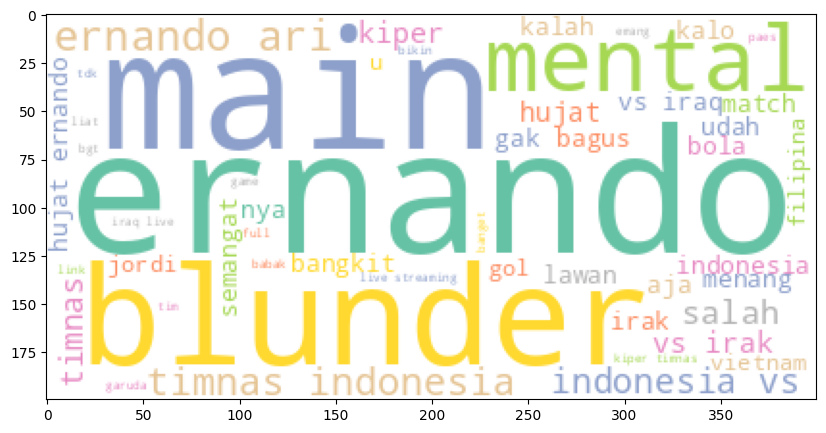

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from matplotlib import pyplot as plt


Text2 = " ".join(str(full_text) for full_text in data_cleaned.stemmed_text.unique())
wordcloud = WordCloud(max_words=50,colormap='Set2', background_color="white").generate(Text2)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.show()

In [ ]:
# Konversi quotes ke dalam bentuk list
li_sentiment = data_cleaned['full_text'].tolist()
print("len(li_sentiment):", len(li_sentiment))

len(li_sentiment): 315


In [ ]:
li_sentiment

['ketua badan tim nasional btn sudji mengungkapkan bahwa ernando ari sutaryadi sudah mulai tersenyum jelang melawan filipina sudji mengakui bahwa mental ernando ari sutaryadi sempat mengalami penurunan karena perasaan bersalah karena kesalahan melawan irak namun kini',
 'dari cr ngmongny kliatan mentalitasny kl lu kalah atau buat kesalahan y uda move on krn uda terjadi semuany prnh ngalamin fokus getting better on point ditujuan selanjutnya buat timnas terkusus ernando ari move on yuk fokus next match vs filipina',
 'esiasi juga buat manusia ini laahhhhhh ernando ari tenang bgt pembawaanya luwes fokus gak bawa kesalahan goal argen pure memang tendangan kelas gilaaaakaan bikin argen ketar ketir inimah',
 'cerdas detail permainan dicatat dengan rapi baik kesalahan dan apa yg harus diperbaiki good job ernando ari',
 'ternyata sampai saat ini masih berlaku ya istilah melakukan kebaikan banyak akan kalah dengan kesalahan semangat terus ernando ari you did a great job',
 'live timnas indones

In [ ]:
#  tentukan dulu POS (Parts Of Speech) untuk: nouns, adjectives, verbs dan adverbs
# Ingat ya ini kita pakai bahasa Indonesia
DI_POS_TYPES = {'NN':'n', 'JJ':'a', 'VB':'v', 'RB':'r'}
POS_TYPES = list(DI_POS_TYPES.keys())

# Constraints dalam token
MIN_STR_LEN = 3
RE_VALID = '[a-zA-Z]'

In [ ]:
# Ambil dulu stopwords, stemmer dan lemmatizer
stopwords = nltk.corpus.stopwords.words('indonesian')
stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# Hapus fungsi aksen
def remove_accents(data):
    return ''.join(x for x in unicodedata.normalize('NFKD', data) if x in string.ascii_letters or x == " ")

# Proses semua quotes
li_tokens = []
li_token_lists = []
li_lem_strings = []

for i,text in enumerate(li_sentiment):
    # Tokenize per kalimat, kemudian jadikan lowercase
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

    # Proses semua token per quote
    li_tokens_quote = []
    li_tokens_quote_lem = []
    for token in tokens:
        # Hapus aksesn
        t = remove_accents(token)

        # Hapus punctuation/tanda baca
        t = str(t).translate(string.punctuation)
        li_tokens_quote.append(t)

        # Tambahkan token yang mewakili "tidak ada kecocokan lemmatisasi"
        li_tokens_quote_lem.append("-") # token ini akan dihapus jika ditemukan kecocokan lemmatisasi di bawah

        # Proses setiap token
        if t not in stopwords:
            if re.search(RE_VALID, t):
                if len(t) >= MIN_STR_LEN:
                    # Ingat bahwa POS (Part Of Speech) diperlukan sebagai masukan ke lemmatizer
                    # (jika tidak maka diasumsikan kata tersebut adalah kata benda)
                    pos = nltk.pos_tag([t])[0][1][:2]
                    pos2 = 'n'  # set default ke noun atau kata benda
                    if pos in DI_POS_TYPES:
                      pos2 = DI_POS_TYPES[pos]

                    stem = stemmer.stem(t)
                    lem = lemmatizer.lemmatize(t, pos=pos2)  # lemmatize dengan POS yang benar

                    if pos in POS_TYPES:
                        li_tokens.append((t, stem, lem, pos))

                        # Hapus token "-" token dan tambahkan kecocokan lemmatisasi
                        li_tokens_quote_lem = li_tokens_quote_lem[:-1]
                        li_tokens_quote_lem.append(lem)

    # Buat daftar daftar token dari token yang dilemmatisasi
    li_token_lists.append(li_tokens_quote)

    # Buat daftar string dari token yang dilemmatisasi
    str_li_tokens_quote_lem = ' '.join(li_tokens_quote_lem)
    li_lem_strings.append(str_li_tokens_quote_lem)

# Bikin dataframes dari lists
data_token_lists = pd.DataFrame(li_token_lists)

print("data_token_lists.head(5):")
print(data_token_lists.head(5).to_string())

# Ganti "None" dengan string kosong
for c in data_token_lists:
    if str(data_token_lists[c].dtype) in ('object', 'string_', 'unicode_'):
        data_token_lists[c].fillna(value='', inplace=True)

data_lem_strings = pd.DataFrame(li_lem_strings, columns=['lem quote'])

print()
print("")
print("data_lem_strings.head():")
print(data_lem_strings.head().to_string())

data_token_lists.head(5):
         0       1          2         3             4          5              6          7          8         9            10     11          12         13         14         15        16       17        18      19         20       21           22         23      24         25         26           27        28        29        30         31       32    33     34    35     36    37     38    39        40    41    42    43    44    45    46    47    48    49    50
0     ketua   badan        tim  nasional           btn      sudji  mengungkapkan      bahwa    ernando       ari    sutaryadi  sudah       mulai  tersenyum     jelang    melawan  filipina    sudji  mengakui   bahwa     mental  ernando          ari  sutaryadi  sempat  mengalami  penurunan       karena  perasaan  bersalah    karena  kesalahan  melawan  irak  namun  kini   None  None   None  None      None  None  None  None  None  None  None  None  None  None  None
1      dari      cr   ngmongny   kliatan

In [ ]:
## Proses hasilnya, temukan kata lemmatisasi paling populer dan hasil pengelompokan berdasarkan Part of Speech (POS)
# Tambahkan counts untuk menghitung total
print("Group by lemmatized words, add count and sort:")
data_all_words = pd.DataFrame(li_tokens, columns=['token', 'stem', 'lem', 'pos'])
data_all_words['counts'] = data_all_words.groupby(['lem'])['lem'].transform('count')
data_all_words = data_all_words.sort_values(by=['counts', 'lem'], ascending=[False, True]).reset_index()

print("Get just the first row in each lemmatized group")
data_words = data_all_words.groupby('lem').first().sort_values(by='counts', ascending=False).reset_index()
print("data_words.head(10):")
print(data_words.head(10))

Group by lemmatized words, add count and sort:
Get just the first row in each lemmatized group
data_words.head(10):
         lem  index      token       stem pos  counts
0    ernando      6    ernando    ernando  NN     261
1  indonesia    101  indonesia  indonesia  NN     156
2     timnas     43     timnas      timna  NN     141
3        ari      7        ari        ari  NN     100
4    blunder    115    blunder    blunder  NN      94
5       irak     25       irak       irak  NN      85
6       live     99       live       live  JJ      62
7      kiper    158      kiper      kiper  NN      58
8       main    233       main       main  JJ      57
9     mental     15     mental     mental  NN      54


In [ ]:
print(data_words.head(20))

          lem  index      token       stem pos  counts
0     ernando      6    ernando    ernando  NN     261
1   indonesia    101  indonesia  indonesia  NN     156
2      timnas     43     timnas      timna  NN     141
3         ari      7        ari        ari  NN     100
4     blunder    115    blunder    blunder  NN      94
5        irak     25       irak       irak  NN      85
6        live     99       live       live  JJ      62
7       kiper    158      kiper      kiper  NN      58
8        main    233       main       main  JJ      57
9      mental     15     mental     mental  NN      54
10       iraq    127       iraq       iraq  NN      50
11     pemain    178     pemain     pemain  NN      47
12       down    159       down       down  RB      40
13    bangkit    112    bangkit    bangkit  NN      39
14      hujat    735      hujat      hujat  NN      38
15     stream   1388  streaming     stream  VB      37
16      piala    152      piala      piala  NN      35
17  kesala

In [ ]:
#Cari 10 kata teratas berdasarkan Part Of Speech (POS)
data_words = data_words[['lem', 'pos', 'counts']].head(200)
for v in POS_TYPES:
    data_pos = data_words[data_words['pos'] == v]
    print()
    print("POS_TYPE:", v)
    print(data_pos.head(10).to_string())


POS_TYPE: NN
          lem pos  counts
0     ernando  NN     261
1   indonesia  NN     156
2      timnas  NN     141
3         ari  NN     100
4     blunder  NN      94
5        irak  NN      85
7       kiper  NN      58
9      mental  NN      54
10       iraq  NN      50
11     pemain  NN      47

POS_TYPE: JJ
        lem pos  counts
6      live  JJ      62
8      main  JJ      57
56      big  JJ      14
57     full  JJ      13
73    asian  JJ      11
103    best  JJ       8
107   great  JJ       8
108   risky  JJ       8
128    next  JJ       7
135  strong  JJ       7

POS_TYPE: VB
         lem pos  counts
15    stream  VB      37
55    follow  VB      15
70        be  VB      11
140     save  VB       6
152     have  VB       6
187       do  VB       5
198  tanding  VB       4

POS_TYPE: RB
       lem pos  counts
12    down  RB      40
71    here  RB      11
110    now  RB       8
112  still  RB       8
127   well  RB       7
160    not  RB       5
168   only  RB       5
186  lihat

li_token_lists_flat[:10]: ['ketua', 'badan', 'tim', 'nasional', 'btn', 'sudji', 'mengungkapkan', 'bahwa', 'ernando', 'ari']
[('ernando', 261), ('indonesia', 156), ('timnas', 141), ('vs', 112), ('di', 102), ('ari', 100), ('blunder', 94), ('irak', 85), ('live', 62), ('yg', 60), ('kiper', 58), ('main', 57), ('mental', 54), ('dan', 53), ('iraq', 50), ('bisa', 49), ('buat', 48), ('pemain', 47), ('dia', 46), ('you', 44), ('bangkit', 39), ('the', 39), ('yang', 39), ('down', 38), ('hujat', 38), ('ini', 37), ('piala', 35), ('ada', 34), ('kesalahan', 31), ('semangat', 30), ('babak', 30), ('filipina', 29), ('shin', 29), ('saat', 28), ('kedua', 28), ('kita', 28), ('dunia', 27), ('ridho', 27), ('lawan', 27), ('taeyong', 26), ('aja', 26), ('kualifikasi', 25), ('to', 25), ('itu', 25), ('juga', 24), ('lebih', 24), ('udah', 24), ('melakukan', 23), ('link', 23), ('lagi', 23), ('bagus', 23), ('kalah', 22), ('pasti', 22), ('tapi', 22), ('masih', 20), ('fatal', 20), ('kamu', 20), ('menang', 20), ('kalo', 2

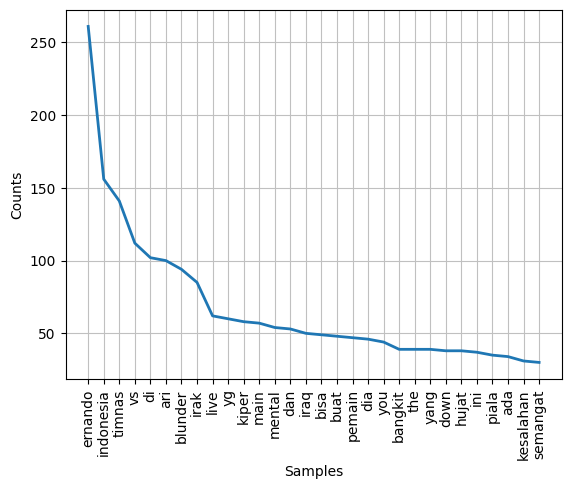

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
li_token_lists_flat = [y for x in li_token_lists for y in x]  # ratakan daftar daftar token menjadi satu daftar
print("li_token_lists_flat[:10]:", li_token_lists_flat[:10])

di_freq = nltk.FreqDist(li_token_lists_flat)
del di_freq['']
li_freq_sorted = sorted(di_freq.items(), key=lambda x: x[1], reverse=True)  # sorted list
print(li_freq_sorted)

di_freq.plot(30, cumulative=False)

[('ernando', 261), ('indonesia', 156), ('timnas', 141), ('ari', 100), ('blunder', 94), ('irak', 85), ('live', 62), ('kiper', 58), ('main', 57), ('mental', 54), ('iraq', 50), ('pemain', 47), ('down', 40), ('bangkit', 39), ('hujat', 38), ('stream', 37), ('piala', 35), ('kesalahan', 31), ('babak', 30), ('semangat', 30), ('filipina', 29), ('shin', 29), ('dunia', 27), ('lawan', 27), ('ridho', 27), ('aja', 26), ('taeyong', 26), ('kualifikasi', 25), ('udah', 24), ('bagus', 23), ('link', 23), ('kalah', 22), ('fatal', 20), ('kalo', 20), ('match', 20), ('menang', 20), ('bola', 19), ('gak', 19), ('jordi', 19), ('gol', 18), ('nya', 18), ('moment', 17), ('gue', 16), ('jumpa', 16), ('menyebut', 16), ('rcti', 16), ('sang', 16), ('watch', 16), ('bgt', 15), ('follow', 15), ('rizky', 15), ('sih', 15), ('stop', 15), ('tim', 15), ('update', 15), ('vietnam', 15), ('big', 14), ('full', 13), ('game', 13), ('hubner', 13), ('sudji', 13), ('badan', 12), ('bermain', 12), ('bikin', 12), ('dgn', 12), ('tdk', 12), 

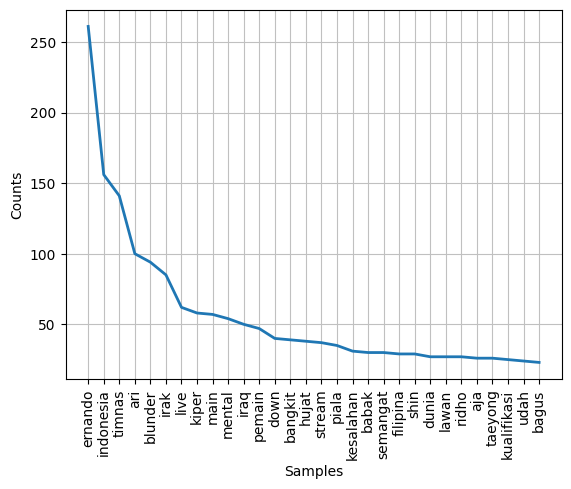

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
## Tampilkan plot frekuensi yang diurutkan untuk kata-kata yang dilemmatisasi setelah menghapus stopwords
li_lem_words = data_all_words['lem'].tolist()
di_freq2 = nltk.FreqDist(li_lem_words)
li_freq_sorted2 = sorted(di_freq2.items(), key=lambda x: x[1], reverse=True)  # sorted list
print(li_freq_sorted2)

di_freq2.plot(30, cumulative=False)

In [ ]:
data_all_words.head(5)

,index,token,stem,lem,pos,counts
0,6,ernando,ernando,ernando,NN,261
1,16,ernando,ernando,ernando,NN,261
2,45,ernando,ernando,ernando,NN,261
3,56,ernando,ernando,ernando,NN,261
4,86,ernando,ernando,ernando,NN,261


In [ ]:
data_cleaned = data_cleaned[['full_text', 'sentiment','stemmed_text','lemmatized_text']]

data_cleaned.head(5)

,full_text,sentiment,stemmed_text,lemmatized_text
0,ketua badan tim nasional btn sudji mengungkapk...,negative,ketua badan tim nasional btn sudji ernando ari...,ketua badan tim nasional btn sudji ernando ari...
1,dari cr ngmongny kliatan mentalitasny kl lu ka...,positive,bicara mental lu kalah salah udah move on krn ...,bicara mentalnya lu kalah kesalahan udah move ...
2,esiasi juga buat manusia ini laahhhhhh ernando...,positive,apresiasi manusia ernando ari tenang bgt pemba...,apresiasi manusia ernando ari tenang bgt pemba...
3,cerdas detail permainan dicatat dengan rapi ba...,positive,cerdas detail main catat rapi salah baik good ...,cerdas detail permainan dicatat rapi kesalahan...
4,ternyata sampai saat ini masih berlaku ya isti...,positive,laku istilah baik kalah salah semangat ernando...,berlaku istilah kebaikan kalah kesalahan seman...


In [ ]:
data_cleaned.to_excel("data_bersih.xlsx") #mengubah dataframe sentimen twitter ke dalam bentuk .xlsx
data_cleaned

,full_text,sentiment,stemmed_text,lemmatized_text
0,ketua badan tim nasional btn sudji mengungkapk...,negative,ketua badan tim nasional btn sudji ernando ari...,ketua badan tim nasional btn sudji ernando ari...
1,dari cr ngmongny kliatan mentalitasny kl lu ka...,positive,bicara mental lu kalah salah udah move on krn ...,bicara mentalnya lu kalah kesalahan udah move ...
2,esiasi juga buat manusia ini laahhhhhh ernando...,positive,apresiasi manusia ernando ari tenang bgt pemba...,apresiasi manusia ernando ari tenang bgt pemba...
3,cerdas detail permainan dicatat dengan rapi ba...,positive,cerdas detail main catat rapi salah baik good ...,cerdas detail permainan dicatat rapi kesalahan...
4,ternyata sampai saat ini masih berlaku ya isti...,positive,laku istilah baik kalah salah semangat ernando...,berlaku istilah kebaikan kalah kesalahan seman...
...,...,...,...,...
310,mentalnya down smnjak blunder vs irak kin juga...,negative,mental down smnjak blunder vs irak kin liat ma...,mentalnya down smnjak blunder v irak kin kelia...
311,pihak persebaya surabaya yakin ernando ari bis...,negative,baya surabaya ernando ari naik mental tanding ...,persebaya surabaya ernando ari menaikkan menta...
312,ketua btn ungkap mental ernando usai blunder d...,negative,ketua btn mental ernando blunder indonesia vs ...,ketua btn mental ernando blunder indonesia v irak
313,mungkin dia lelah rt ft irak vs timnas indones...,negative,lelah rt ft irak vs timnas indonesia sayang ka...,lelah rt ft irak v timnas indonesia sayang kal...


In [ ]:
stemmer = PorterStemmer()        #PorterStemmer digunakan untuk proses stemming bertujuan untuk mengubah suatu kata menjadi bentuk dasarnya
lemmatizer = WordNetLemmatizer() #WordNetLemmatizer adalah proses lemmatization yang lebih canggih daripada stemming. digunakan untuk mengubah kata menjadi bentuk kamus atau bentuk baku, dengan mempertimbangkan jenis kata

In [ ]:
def clean_text(text, stemming=False, lemmatization=False): #bertujuan untuk membersihkan teks bahasa Indonesia (atau bahasa lainnya)
    if isinstance(text, str): #bertujuan untuk mengecek apakah argumen text memang sebuah string. Jika bukan, fungsi langsung mengembalikan string kosong ('')
        tokens = word_tokenize(text.lower()) #bertujuan untuk membagi-bagi kata dan mengubah teks menjadi huruf kecil menggunakan text.lower()
        cleaned_tokens = [word for word in tokens if word.isalnum() and word not in stop_words] #membuat daftar baru bernama cleaned_tokens untuk menyimpan kata-kata yang sudah dibersihkan
        if stemming: #jika stemming adalah True, maka fungsi objek stemmer akan berjalan untuk mereduksi setiap kata dalam cleaned_tokens ke bentuk dasarnya
            stemmed_tokens = [stemmer.stem(word) for word in cleaned_tokens]
            return ' '.join(stemmed_tokens)
        elif lemmatization: #jika lemmatization adalah True, maka fungsi objek lemmatizer akan berjalan untuk mengubah setiap kata dalam cleaned_tokens ke bentuk kamusnya
            lemmatized_tokens = [lemmatizer.lemmatize(word) for word in cleaned_tokens]
            return ' '.join(lemmatized_tokens)
        else:
            return ' '.join(cleaned_tokens)
    else:
        return ''

In [ ]:
#membuat kolom baru dengan teks yang telah dibersihkan
data_cleaned['cleaned_stemmed_text'] = data_cleaned['stemmed_text'].apply(clean_text, stemming=True)
data_cleaned['cleaned_lemmatized_text'] = data_cleaned['lemmatized_text'].apply(clean_text, lemmatization=True)

<ipython-input-60-7d07dce26479>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['cleaned_stemmed_text'] = data_cleaned['stemmed_text'].apply(clean_text, stemming=True)
<ipython-input-60-7d07dce26479>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['cleaned_lemmatized_text'] = data_cleaned['lemmatized_text'].apply(clean_text, lemmatization=True)


In [ ]:
#digunakan untuk mengambil polarity dari suatu teks menggunakan TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    return sentiment.polarity

In [ ]:
#digunakan untuk mengambil sentiment dari setiap teks yang ada dalam dua kolom berbeda
data_cleaned['sentiment_stemmed'] = data_cleaned['cleaned_stemmed_text'].apply(get_sentiment)
data_cleaned['sentiment_lemmatized'] = data_cleaned['cleaned_lemmatized_text'].apply(get_sentiment)

<ipython-input-62-d29f7eac59a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['sentiment_stemmed'] = data_cleaned['cleaned_stemmed_text'].apply(get_sentiment)
<ipython-input-62-d29f7eac59a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['sentiment_lemmatized'] = data_cleaned['cleaned_lemmatized_text'].apply(get_sentiment)


In [ ]:
# Buat WordCloud
def generate_wordcloud(text_column, title):
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(' '.join(text_column))

    # Plot WordCloud
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title)

    plt.show()

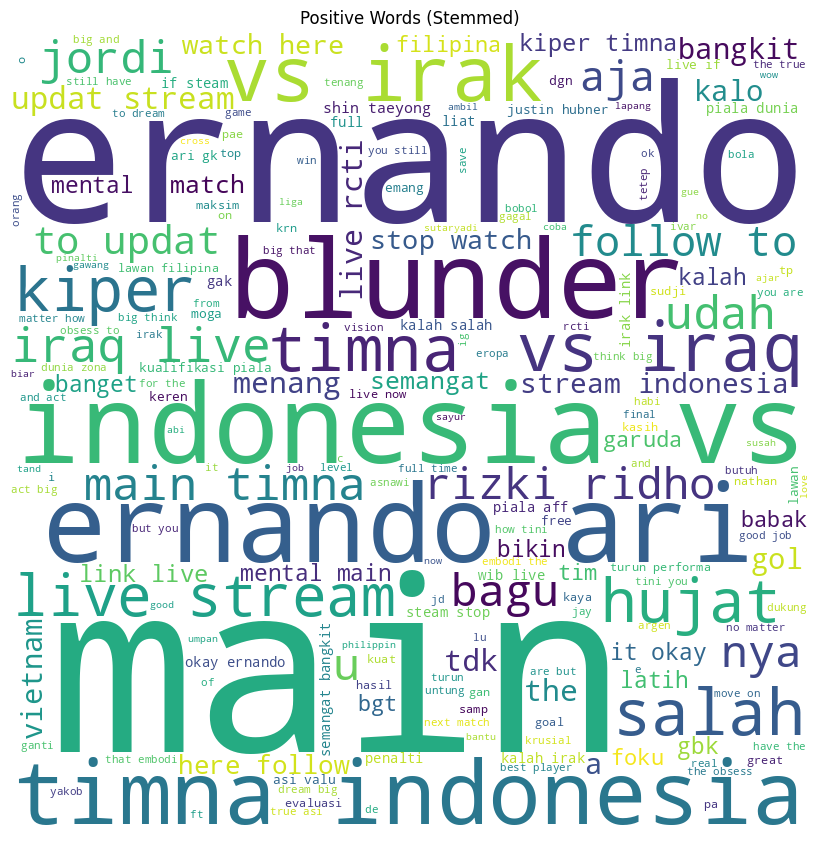

In [ ]:
#positive words
positive_text_stemmed = data_cleaned[data_cleaned['sentiment_stemmed'] > 0]['cleaned_stemmed_text']
generate_wordcloud(positive_text_stemmed, "Positive Words (Stemmed)")

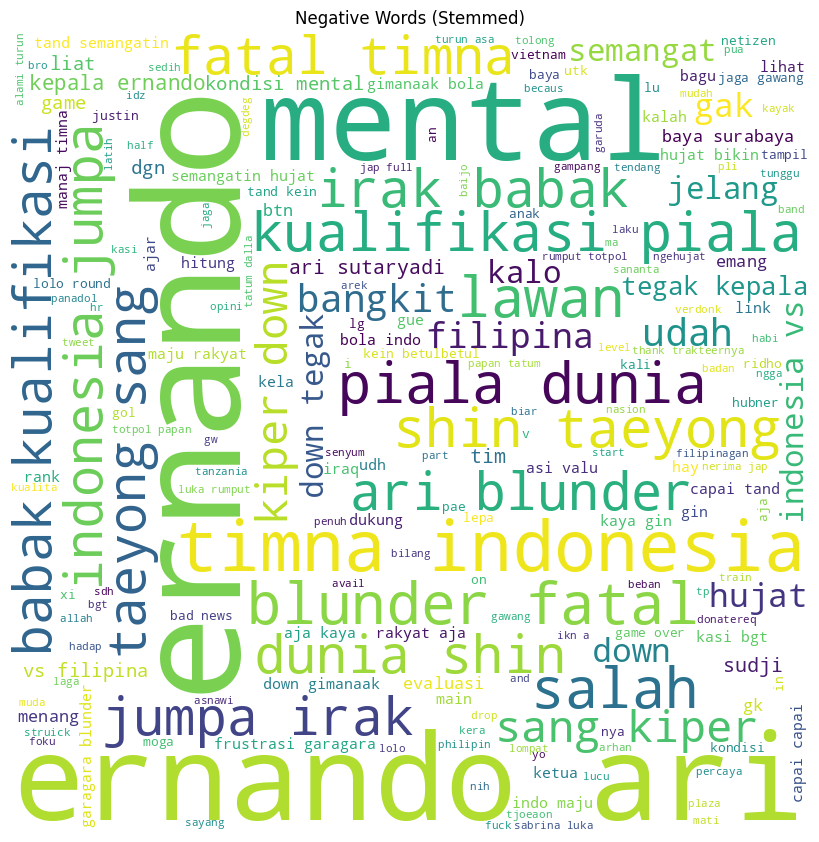

In [ ]:
#Negative words
negative_text_stemmed = data_cleaned[data_cleaned['sentiment_stemmed'] < 0]['cleaned_stemmed_text']
generate_wordcloud(negative_text_stemmed, "Negative Words (Stemmed)")

## TFIDF

In [ ]:
train = data_cleaned.cleaned_stemmed_text.to_list()

# instantiate the vectorizer object
countvectorizer = CountVectorizer(analyzer = 'word', stop_words= stop_words_list)
tfidfvectorizer = TfidfVectorizer(analyzer = 'word', stop_words = stop_words_list)

# convert the documents into a matrix
count_wm = countvectorizer.fit_transform(train)
tfidf_wm = tfidfvectorizer.fit_transform(train)

#count_tokens = tfidfvectorizer.get_feature_names() # no difference
count_tokens = countvectorizer.get_feature_names_out()
tfidf_tokens = tfidfvectorizer.get_feature_names_out()

df_countvect = pd.DataFrame(data = count_wm.toarray(), index = [f'Data ke {i + 1}' for i in range(len(data_cleaned.cleaned_stemmed_text))], columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(), index = [f'Data ke {i + 1}' for i in range(len(data_cleaned.cleaned_stemmed_text))], columns = tfidf_tokens)

print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

Count Vectorizer

             abai  abangkuh  abi  about  abov  abroad  absolut  achiev  act  \
Data ke 1       0         0    0      0     0       0        0       0    0   
Data ke 2       0         0    0      0     0       0        0       0    0   
Data ke 3       0         0    0      0     0       0        0       0    0   
Data ke 4       0         0    0      0     0       0        0       0    0   
Data ke 5       0         0    0      0     0       0        0       0    0   
...           ...       ...  ...    ...   ...     ...      ...     ...  ...   
Data ke 311     0         0    0      0     0       0        0       0    0   
Data ke 312     0         0    0      0     0       0        0       0    0   
Data ke 313     0         0    0      0     0       0        0       0    0   
Data ke 314     0         0    0      0     0       0        0       0    0   
Data ke 315     0         0    0      0     0       0        0       0    0   

             adel  ...  yee  yo  

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [ ]:
data_cleaned

,full_text,sentiment,stemmed_text,lemmatized_text,cleaned_stemmed_text,cleaned_lemmatized_text,sentiment_stemmed,sentiment_lemmatized
0,ketua badan tim nasional btn sudji mengungkapk...,negative,ketua badan tim nasional btn sudji ernando ari...,ketua badan tim nasional btn sudji ernando ari...,ketua badan tim nasion btn sudji ernando ari s...,ketua badan tim nasional btn sudji ernando ari...,-0.100000,-0.100000
1,dari cr ngmongny kliatan mentalitasny kl lu ka...,positive,bicara mental lu kalah salah udah move on krn ...,bicara mentalnya lu kalah kesalahan udah move ...,bicara mental lu kalah salah udah move on krn ...,bicara mentalnya lu kalah kesalahan udah move ...,0.133333,0.250000
2,esiasi juga buat manusia ini laahhhhhh ernando...,positive,apresiasi manusia ernando ari tenang bgt pemba...,apresiasi manusia ernando ari tenang bgt pemba...,apresiasi manusia ernando ari tenang bgt pemba...,apresiasi manusia ernando ari tenang bgt pemba...,0.214286,0.214286
3,cerdas detail permainan dicatat dengan rapi ba...,positive,cerdas detail main catat rapi salah baik good ...,cerdas detail permainan dicatat rapi kesalahan...,cerda detail main catat rapi salah good job er...,cerdas detail permainan dicatat rapi kesalahan...,0.433333,0.700000
4,ternyata sampai saat ini masih berlaku ya isti...,positive,laku istilah baik kalah salah semangat ernando...,berlaku istilah kebaikan kalah kesalahan seman...,laku istilah kalah salah semangat ernando ari ...,berlaku istilah kebaikan kalah kesalahan seman...,0.800000,0.800000
...,...,...,...,...,...,...,...,...
310,mentalnya down smnjak blunder vs irak kin juga...,negative,mental down smnjak blunder vs irak kin liat ma...,mentalnya down smnjak blunder v irak kin kelia...,mental down smnjak blunder vs irak kin liat ma...,mentalnya down smnjak blunder v irak kin kelia...,-0.029630,-0.155556
311,pihak persebaya surabaya yakin ernando ari bis...,negative,baya surabaya ernando ari naik mental tanding ...,persebaya surabaya ernando ari menaikkan menta...,baya surabaya ernando ari mental tand timna in...,persebaya surabaya ernando ari menaikkan menta...,-0.100000,-0.100000
312,ketua btn ungkap mental ernando usai blunder d...,negative,ketua btn mental ernando blunder indonesia vs ...,ketua btn mental ernando blunder indonesia v irak,ketua btn mental ernando blunder indonesia vs ...,ketua btn mental ernando blunder indonesia v irak,-0.100000,-0.100000
313,mungkin dia lelah rt ft irak vs timnas indones...,negative,lelah rt ft irak vs timnas indonesia sayang ka...,lelah rt ft irak v timnas indonesia sayang kal...,lelah rt ft irak vs timna indonesia sayang kal...,lelah rt ft irak v timnas indonesia sayang kal...,0.000000,0.000000


## SPLITTING DATA

In [ ]:
X = df_tfidfvect.values
y = np.array([(1 if i == 'positive' else 0) for i in data_cleaned.sentiment])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 0)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (252, 1438)
X_test shape: (63, 1438)
y_train shape: (252,)
y_test shape: (63,)


## SVM CLASSIFICATION

In [ ]:
from sklearn.svm import SVC

# Membuat model SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

### DATA TRAIN & DATA TEST

In [ ]:
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

In [ ]:
print(f"Training Time: {training_time} seconds")

Training Time: 0.029142379760742188 seconds


In [ ]:
# Mengukur waktu pengujian
start_test_time = time.time()
y_pred = model.predict(X_test)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

In [ ]:
print(f"Testing Time: {testing_time} seconds")

Testing Time: 0.00905609130859375 seconds


### EVALUATION

In [ ]:
print("CONFUSION MATRIX")
print("================")
print(confusion_matrix(y_test, y_pred))
print("CLASSIFICATION REPORT")
print("=====================")
print(classification_report(y_test, y_pred))

CONFUSION MATRIX
[[15 14]
 [ 0 34]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.52      0.68        29
           1       0.71      1.00      0.83        34

    accuracy                           0.78        63
   macro avg       0.85      0.76      0.76        63
weighted avg       0.84      0.78      0.76        63



In [ ]:
# prediction testing
le = LabelEncoder()
le.fit(y)

review = ' blunder fatal ernando'

review_vector = tfidfvectorizer.transform([review]).toarray()
pred_text = model.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
print('positive' if pred_text == 1 else 'negative')

negative


In [ ]:
# prediction testing
le = LabelEncoder()
le.fit(y)

review = ' Semangat ernando'

review_vector = tfidfvectorizer.transform([review]).toarray()
pred_text = model.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
print('positive' if pred_text == 1 else 'negative')

positive


In [ ]:
# Menghitung jumlah masing-masing label
sentiment_counts = data_cleaned['sentiment'].value_counts()

# Menghitung persentase
total_samples = data_cleaned.shape[0]
positive_percentage = (sentiment_counts.get('positive', 0) / total_samples) * 100
negative_percentage = (sentiment_counts.get('negative', 0) / total_samples) * 100

# Menampilkan hasil
print(f"Persentase Sentimen Positive: {positive_percentage:.2f}%")
print(f"Persentase Sentimen Negative: {negative_percentage:.2f}%")

Persentase Sentimen Positive: 63.17%
Persentase Sentimen Negative: 36.83%
